#ICT3104 Team 17

This project makes use of the existing Follow Your Pose project and curated it in such a way that users are able to upload their video files locally for both Training and MMPose. Users should also be able to compare the outputs  of the training to decide which outputs suit best for them. In the first section,  users would run MMPose code, followed by training then Inferencing. Users can then  do some analysis on the result using Superimpose as well as calculating the FID value.

This Colab contains 5 sections: Uploading files and making a skeleton video with MMPose, training a model, inferencing using the skeleton video, model and prompts, visual analysis via superimposing skeleton video onto output and qualitative analysis by calculation of FID with input and output videos.

Please do note that all these sections must be done in order. The first code block is especially important for installing all dependencies. Take note of all input parameters to select input files or adjust fields to affect the output.

## 1. MMPose

This section uses MMPose to generate a skeleton video.
Use all 1.2 code blocks as necessary to upload files needed for training, mmpose and inference.
Use 1.3 to generate skeleton video using mmpose.

In [ ]:
#@title 1.1 Install Dependencies
!sudo apt update -y
!sudo apt install python3.8 python3.8-distutils python3.8-dev -y
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Uygnis/ict3104-team17-2023.git

!cd /content/ict3104-team17-2023
!export PYTHONPATH=/content/ict3104-team17-2023:$PYTHONPATH
!apt update
!python3.8 -m pip install -q diffusers==0.11.1 torch==1.13.1 transformers==4.26.0 bitsandbytes==0.35.4 \
decord accelerate einops imageio-ffmpeg xformers==0.0.16  --extra-index-url https://download.pytorch.org/whl/cu11
%pip install -q omegaconf
%cd /content/ict3104-team17-2023
!python3.8 -m pip install -r requirements.txt

!pip install moviepy jsonlines pytube ipywidgets IPython PyYAML opencv-python
!pip install jsonlines
!pip uninstall triton -y
!pip install triton==2.0.0 -U
!apt-get install python3.8 python3-pip python3.8-distutils
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 1
!python3 -m pip install pytorch-fid

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jam

Found existing installation: triton 1.1.1
Uninstalling triton-1.1.1:
  Successfully uninstalled triton-1.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 22.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lit: filename=lit-17.0.5-py3-none-any.whl size=93256 sha256=b894a8775ba9031b8444e34024566e65767c196f7b9ca9d5eb5262d2360dceb3
  Stored in directory: /root/.cache/pip/wheels/5f/dc/db/b1b1309ce39d7bb9da189699607915e0ccd116fcbced96f31e
Successfully built lit
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.4).
python3.8 is already the newe

In [ ]:
#@title 1.2.1 Upload Your Own Dataset (Video Upload) [OPTIONAL]
# Import the necessary libraries
import os
from google.colab import files
import shutil

# Define the parameters using param
folder_name = "CustomFolder"  # Default folder name
create_new_folder = True  # Default choice to create a new folder

#@title Upload Your Dataset

#@markdown This would be uploaded into './dataset/{type of dataset}/video_clips'
#@markdown If the dataset is called Sims4, it would  be uploaded into './dataset/Sims4/video_clips'.

#@markdown Enter the name of the folder to create and upload to, please follow this format {type of dataset}/video_clips:

folder_name = "Sims4/video_clips" #@param {type:"string"}

#@markdown Check this box to create a new folder for the uploaded dataset:
create_new_folder = True #@param {type:"boolean"}

# Define the target folder path
if create_new_folder:
    # Create a new folder with the specified name inside the "dataset" directory
    new_folder = f"./dataset/{folder_name}"
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)
else:
    # Use the existing "dataset" directory
    new_folder = "./dataset"

# Upload the file(s) and move them to the specified folder
uploaded = files.upload()
for filename in uploaded.keys():
    # Check if the file with the same name already exists in the folder
    if os.path.exists(os.path.join(new_folder, filename)):
        # Append a unique identifier to the filename
        base, ext = os.path.splitext(filename)
        count = 1
        while os.path.exists(os.path.join(new_folder, f"{base}_{count}{ext}")):
            count += 1
        new_filename = f"{base}_{count}{ext}"
    else:
        new_filename = filename

    dst_path = os.path.join(new_folder, new_filename)
    shutil.move(filename, dst_path)

# Print the path to the folder where the files were uploaded
print(f"Uploaded files are located in the folder: {new_folder}")


Saving TV_S8L2_m4.avi to TV_S8L2_m4.avi
Uploaded files are located in the folder: ./dataset/Sims4/video_clips


In [ ]:
#@title 1.2.2 Sims4 comes in AVI extension, convert to mp4 file first [OPTIONAL]

#Convert all files containing avi in folder
# Import the required libraries
import os
from moviepy.editor import VideoFileClip

# Set the input and output directories
input_dir = f"./dataset/{folder_name}"  # Replace with the path to your input folder
# Create the output directory using the specified format
parent_path = folder_name.split('/')[0]
output_dir = f"./dataset/{parent_path}_converted/video_clips"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".avi"):
        # Construct the full file paths
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".mp4")

        # Convert AVI to MP4
        video_clip = VideoFileClip(input_path)
        video_clip.write_videofile(output_path, codec="libx264")
        video_clip.close()

print("Conversion completed.")

In [ ]:
#@title 1.2.3 Upload Your Own Dataset (Create csv metadata) [OPTIONAL]
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import os

# Define the path for the CSV file
#@markdown Enter the name of the folder to create and upload to, please follow this format {file_name.csv}:

input_path_csv = 'sim4.csv' #@param {type:"string"}
csv_path = f"./dataset/{input_path_csv}"
# Check if the CSV file already exists, and create it if not
if not os.path.isfile(csv_path):
    # If the file does not exist, create a DataFrame with columns
    df = pd.DataFrame(columns=['id', 'script'])
else:
    # If the file exists, load it into a DataFrame
    df = pd.read_csv(csv_path)

# Function to add a new row
def add_row(id_val, script_val):
    global df  # Declare df as a global variable
    new_row = {'id': id_val, 'script': script_val}
    df = df.append(new_row, ignore_index=True)

# Create input widgets for 'id' and 'script'
id_input = widgets.Text(value='', placeholder='Enter id', description='ID:', continuous_update=False)
script_input = widgets.Text(value='', placeholder='Enter script', description='Script:', continuous_update=False)

# Create a button to add the row
add_button = widgets.Button(description="Add Row")

# Function to handle button click event
def add_button_click(b):
    add_row(id_input.value, script_input.value)
    id_input.value = ''
    script_input.value = ''
    # ... Additional code to save the DataFrame to a CSV file.
    df.to_csv(csv_path, index=False)

# Attach the function to the button's click event
add_button.on_click(add_button_click)

# Display the input widgets and the button
display(id_input)
display(script_input)
display(add_button)
#@markdown Add row record

# Interactive input loop
print("Fill in the fields and click 'Add Row' to add a new row.")




In [ ]:
#@title 1.2.4 Upload Your Own Dataset (Display uploaded video) [OPTIONAL]
from ipyfilechooser import FileChooser
from ipywidgets import Video
from moviepy.editor import VideoFileClip
import os
# Create a FileChooser widget
fc = FileChooser('./dataset')  # Set an initial directory path
display(fc)

# Define the callback function
def convert_and_display_video(change):
    if fc.selected:
        input_video_path = fc.selected

        # Check if the input path doesn't end with '.mp4'
        if not input_video_path.lower().endswith('.mp4'):
            # Replace the input extension with '.mp4' for the output path
            output_video_path = input_video_path.rsplit('.', 1)[0] + '.mp4'
        else:
            output_video_path = input_video_path

        # Convert the video to MP4
        clip = VideoFileClip(input_video_path)
        clip.write_videofile(output_video_path, codec="libx264", fps=clip.fps)
        os.remove(input_video_path)

        # Display the converted video
        from ipywidgets import Video
        video_widget = Video.from_file(output_video_path, width=320, height=320)
        display(video_widget)

# Register the callback function
fc.register_callback(convert_and_display_video)


In [ ]:
#@title 1.3 Create Pose Generation Script & Run
#@markdown The resultant video would be used as Skeleton Video.

#@markdown Keep Clip_Length>20 to avoid error

Clip_Length = 36 #@param {type:"number"}
Clip_Height = 512 #@param {type:"number"}

#@markdown Change the file name if you upload your own file, the format would be ./dataset/{type of dataset}/video_clips/{video name}.mp4.
#@markdown If your dataset = Charades_v1_480, video name = O4P08, inputh path would be ./dataset/Charades_v1_480/video_clips/O4P08.mp4.
#@markdown This can only generate one skeleton path at a time which will generate pose according to the video stated in the video name.
Input_Path = "./dataset/Charades_v1_480/video_clips/O4P08.mp4" #@param {type:"string"}

#@markdown Output file would be uploaded into ./mmpose_output
Output_Filename = "output_file2.mp4" #@param {type:"string"}

python_code="""import os
import cv2
import numpy as np
from PIL import Image
from moviepy.editor import *
import copy
import gradio as gr
from transformers import AutoTokenizer, CLIPTextModel
from huggingface_hub import snapshot_download
import sys
import argparse

sys.path.append('FollowYourPose')

def get_frames(video_in):
    print("Working on:" + video_in)
    frames = []
    #resize the video
    clip = VideoFileClip(video_in)
    start_frame = 0
    end_frame = {}
    clip_height = {}


    if not os.path.exists('./raw_frames'):
        os.makedirs('./raw_frames')

    if not os.path.exists('./mmpose_frames'):
        os.makedirs('./mmpose_frames')


    clip_resized = clip.resize(height=clip_height)
    print("Resized Height")
    clip_resized = clip_resized.subclip(start_frame / clip.fps, end_frame / clip.fps) # subclip 5 seconds
    print("Cut the Clip")
    clip_resized.write_videofile("./video_resized.mp4", fps=clip.fps)
    end_frame = int(clip.fps * clip_resized.duration)

    # Opens the Video file with CV2
    cap= cv2.VideoCapture("./video_resized.mp4")

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    print("video fps: " + str(fps))
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cv2.imwrite('./raw_frames/kang'+str(i)+'.jpg',frame)
        frames.append('./raw_frames/kang'+str(i)+'.jpg')
        i+=1

    cap.release()
    cv2.destroyAllWindows()
    print("broke the video into frames")

    return frames, fps

def get_mmpose_filter(mmpose, i):
    #image = Image.open(i)

    #image = np.array(image)
    image = mmpose(i, fn_index=0)[1]
    image = Image.open(image)
    #image = Image.fromarray(image)
    image.save("./mmpose_frames/mmpose_frame_" + str(i).split('/')[-1][:-4] + ".jpeg")
    return "./mmpose_frames/mmpose_frame_" + str(i).split('/')[-1][:-4] + ".jpeg"

def create_video(frames, fps,  output_directory="./mmpose_output"):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    print("building video result")
    clip = ImageSequenceClip(frames, fps=fps)
    output_filename = f"{}"
    output_path = os.path.join(output_directory, output_filename)
    clip.write_videofile(output_path, fps=fps)

    return output_path


def infer_skeleton(mmpose, video_in):


    # 1. break video into frames and get FPS

    break_vid = get_frames(video_in)
    frames_list= break_vid[0]
    fps = break_vid[1]
    #n_frame = int(trim_value*fps)
    n_frame = len(frames_list)

    if n_frame >= len(frames_list):
        print("video is shorter than the cut value")
        n_frame = len(frames_list)

    # 2. prepare frames result arrays
    result_frames = []
    print("set stop frames to: " + str(n_frame))

    for i in frames_list[0:int(n_frame)]:
        mmpose_frame = get_mmpose_filter(mmpose, i)
        result_frames.append(mmpose_frame)
        print("frame " + i + "/" + str(n_frame) + ": done;")


    final_vid = create_video(result_frames, fps, "mmpose_output")
    files = [final_vid]

    return final_vid, files


mmpose = gr.Interface.load(name="spaces/YueMafighting/mmpose-estimation")
final_vid, files = infer_skeleton(mmpose, "{}")""".format(Clip_Length, Clip_Height, Output_Filename,Input_Path)

with open("poseGeneration.py", 'w') as file:
    file.write(python_code)

#run the script
!python3.8 poseGeneration.py


## 2. Training

This section is responsible for training a new model to be used for inference. Firstly, a pre trained model is downloaded. Then several parameters are set for the training, including defining input files and output adjustment fields. After training is done, the user may test the new model by generating a few gifs with it.

Please note if user would like to use their own files, the upload functions are in section 1.2.

In [ ]:
#@title 2.1 Download Pretrained Models
#@markdown This Subsection takes a bit of time.
#@markdown Name/Path of the initial model.
MODEL_DIR = "FollowYourPose_v1" #@param {type:"string"}

#@markdown If model should be download from a remote repo. Untick it if the model is loaded from a local path.
download_pretrained_model = True #@param {type:"boolean"}
if download_pretrained_model:
    %mkdir checkpoints
    !git lfs install
    !git clone https://huggingface.co/YueMafighting/$MODEL_DIR
    %mv /content/ict3104-team17-2023/FollowYourPose_v1/* /content/ict3104-team17-2023/checkpoints/
    %rm -rf FollowYourPose_v1
    %mkdir output
    %mkdir output/followyourpose_checkpoint-1000
    %mv /content/ict3104-team17-2023/checkpoints/followyourpose_checkpoint-1000/* /content/ict3104-team17-2023/output/followyourpose_checkpoint-1000
    %rm -rf checkpoints/followyourpose_checkpoint-1000
    MODEL_DIR = f"./checkpoints"
print(f"[*] MODEL_DIR={MODEL_DIR}")



Updated git hooks.
Git LFS initialized.
Cloning into 'FollowYourPose_v1'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), 584.62 KiB | 8.23 MiB/s, done.


In [ ]:
#@title 2.2 Specify File Dirs

#@markdown Pretrained Model Path
STABLE_DIFFUSION_MODEL = "stable-diffusion-v1-4" #@param {type:"string"}
STABLE_DIFFUSION_MODEL = f"{MODEL_DIR}/{STABLE_DIFFUSION_MODEL}"
print(f"[*] STABLE_DIFFUSION_MODEL={STABLE_DIFFUSION_MODEL}")

#@markdown Output Path
OUTPUT_DIR = "output" #@param {type:"string"}
OUTPUT_DIR = f"./{OUTPUT_DIR}"
print(f"[*] OUTPUT_DIR={OUTPUT_DIR}")

#@markdown Checkpoint Model Path
#@markdown
CHECKPOINT_MODEL = ""  #@param {type:"string"}
print(f"[*] CHECKPOINT_MODEL={CHECKPOINT_MODEL}")

#@markdown Config Path
CONFIG_DIR = "configs" #@param {type:"string"}
CONFIG_DIR = f"./{CONFIG_DIR}"
print(f"[*] CONFIG_DIR={CONFIG_DIR}")

#@markdown Specify the directory where you want to save skeleton .mp4 files
SKELETON_DATA = "mmpose_output" #@param {type:"string"}
SKELETON_DATA = f"./{SKELETON_DATA}"
print(f"[*] SKELETON_DATA={SKELETON_DATA}")

#@markdown Specify the directory where you want to search for .mp4 files
VIDEO_DATA = "Charades_v1_480" #@param {type:"string"}
VIDEO_DATA = f"./dataset/{VIDEO_DATA}/video_clips"

print(f"[*] VIDEO_DATA={VIDEO_DATA}")

In [ ]:
#@title 2.3 Train Config for Fine-Tuning

from omegaconf import OmegaConf

%mkdir configs

# Create a global variable to store validation prompts
global_validation_prompts_config = []

#@markdown
#@markdown use comma(,) to signify BATCH. Make sure all have the same array length. The dafault values are for a batch of 3.
CONFIG_NAME = "configs/apose.yaml,configs/apose1.yaml,configs/apose2.yaml" #@param {type:"string"}
video_length = "8,8,8" #@param {type:"string"}
sample_frame_rate = "4,4,4" #@param {type:"string"}
train_steps = "100,300,500" #@param {type:"string"}
checkpointing_steps="100,300,500" #@param {type:"string"}
validation_steps= "100,300,500" #@param {type:"string"}

#@markdown
#@markdown UNBATCH
learning_rate = 3e-5 #@param {type:"number"}
width = 512 #@param {type:"number"}
height = 512 #@param {type:"number"}
skeleton_path = './mmpose_output/output_file2.mp4' # @param {type:"string"}
train_prompt = "A person walks into a garage and throws something into a bin. That same person then picks up an open laptop off a shelf, closes it and walks way.;A person runs into the garage, throws something in a bucket, picks up a laptop from a shelf, closes it and then runs back out." #@param {type:"string"}
meta_path = "Charades_v1_desc.csv" # @param {type:"string"}

# Specify one or more validation prompts as a comma-separated string
validation_prompts_string = "A boy on the beach, A girl in the forest" # @param {type:"string"}
# Split the string into a list of individual prompts
validation_prompts_list = [prompt.strip() for prompt in validation_prompts_string.split(',')]

# Move the list creation outside the loop
OUTPUT = OUTPUT_DIR
global_validation_prompts_config = validation_prompts_list

for i in range(len(CONFIG_NAME.split(","))):
  # Use the global list of validation prompts for each configuration
  validation_prompts = global_validation_prompts_config

  config = {
    "pretrained_model_path": STABLE_DIFFUSION_MODEL,
    "output_dir": OUTPUT_DIR,
    "resume_from_checkpoint": CHECKPOINT_MODEL,
    "skeleton_path": skeleton_path,
    "config_name":CONFIG_NAME.split(",")[i].split("/")[1],
    "train_data": {
      "meta_path":meta_path,
      "prompt": train_prompt,
      "n_sample_frames": 4,
      "width": width,
      "height": height,
      "sample_start_idx": 0,
      "dataset_set": "train",
      "sample_frame_rate":  int(sample_frame_rate.split(',')[i]),
    },
    "validation_data": {
      "prompts": validation_prompts,
      "video_length": int(video_length.split(',')[i]),
      "width": width,
      "height": height,
      "num_inference_steps": 20,
      "guidance_scale": 12.5,
      "use_inv_latent": False,
      "num_inv_steps": 20,
      "dataset_set": "val"
    },
    "learning_rate": learning_rate,
    "train_batch_size": 1,
    "max_train_steps":   int(train_steps.split(',')[i]),
    "checkpointing_steps":  int(checkpointing_steps.split(',')[i]),
    "validation_steps": int(validation_steps.split(',')[i]),
    "trainable_modules": [
      "attn1.to_q",
      "attn2.to_q",
      "attn_temp",
      "conv_temporal",
    ],
    "seed": 33,
    "mixed_precision": "no",
    "use_8bit_adam": False,
    "gradient_checkpointing": True,
    "enable_xformers_memory_efficient_attention": True,
  }

  OmegaConf.save(config, CONFIG_NAME.split(",")[i])


In [ ]:
#@title 2.4 Adjust Frame Dimension if too big or small [OPTIONAL]
#@markdown In this project, 512x512 would be preferred.
import glob
import cv2

# Use glob to get a list of .mp4 files in the specified directory
mp4_files = glob.glob(f"{VIDEO_DATA}/*.mp4")

# Print the list of .mp4 files
for mp4_file in mp4_files:
    cap = cv2.VideoCapture(mp4_file)
    frame_width = 512  #@param {type:"number"}
    original_frame_width = int(cap.get(3))
    original_frame_height = int(cap.get(4))
    # Calculate the new frame height while maintaining the aspect ratio
    frame_height = int(frame_width * original_frame_height / original_frame_width)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(mp4_file, fourcc, 30, (frame_width, frame_height))
    while True:
      ret, frame = cap.read()
      if not ret:
          break
      frame = cv2.resize(frame, (frame_width, frame_height))
      out.write(frame)

    cap.release()
    out.release()
    print(mp4_file, " has been cropped")

./dataset/Charades_v1_480/video_clips/OB7UK.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/OCUPZ.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/OB9D0.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O283L.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O6DZ0.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O3Y57.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O1ILB.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O6DJW.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O2VP8.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/O4P08.mp4  has been cropped
./dataset/Charades_v1_480/video_clips/OAL0G.mp4  has been cropped


In [ ]:
#@title 2.5 Create Dataloader File

dataloader_name = "dataloader" #@param {type:"string"}
custom_dataloader_name = dataloader_name
content="""import os
import random
from abc import abstractmethod
import math
import pandas as pd
import av
import cv2
import decord
import numpy as np
import torch
import json
import jsonlines
from IPython.display import display, HTML
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from decord import VideoReader, cpu
import torchvision.transforms._transforms_video as transforms_video
from torchvision.transforms.functional import to_tensor
from collections import OrderedDict
import time
import csv
import base64


class Dataset(Dataset):
    \"\"\"
    Dataset.
    Assumes webvid data is structured as follows.
    HDVila/
        part_N/ # 0-10
            video_clips/        ($page_dir)
                1.mp4           (videoid.mp4)
                ...
                5000.mp4
            ...
    \"\"\"



    def __init__(self,
                meta_path,
                width=512,
                height=512,
                n_sample_frames=8,
                dataset_set="train",
                prompt=None,
                sample_frame_rate=4,
                sample_start_idx=0,
                accelerator=None,
                ):
        try:
            host_gpu_num = accelerator.num_processes
            host_num = 1
            all_rank = host_gpu_num * host_num
            global_rank = accelerator.local_process_index
        except:
            pass

        self.data_dir = './dataset'
        self.meta_path = os.path.join(self.data_dir, meta_path)

        spatial_transform = 'resize_center_crop'
        resolution=width
        load_raw_resolution=True

        video_length= n_sample_frames
        fps_max=None
        load_resize_keep_ratio=False



        self.global_rank = global_rank
        self.all_rank = all_rank
        # self.subsample = subsample
        self.video_length = video_length
        self.resolution = [resolution, resolution] if isinstance(resolution, int) else resolution
        self.frame_stride = sample_frame_rate
        self.load_raw_resolution = load_raw_resolution
        self.fps_max = fps_max
        self.load_resize_keep_ratio = load_resize_keep_ratio
        print('start load meta data')
        self._load_metadata()
        print('load meta data done!!!')
        if spatial_transform is not None:
            if spatial_transform == "random_crop":
                self.spatial_transform = transforms_video.RandomCropVideo(crop_resolution)
            elif spatial_transform == "resize_center_crop":
                assert(self.resolution[0] == self.resolution[1])
                self.spatial_transform = transforms.Compose([
                    transforms.Resize(resolution),
                    transforms_video.CenterCropVideo(resolution),
                    ])
                print(self.spatial_transform)
            elif spatial_transform == "center_crop":
                self.spatial_transform = transforms_video.CenterCropVideo(resolution)
            else:
                raise NotImplementedError
        else:
            self.spatial_transform = None



    def _load_metadata(self):
        # clip_id frame_id caption
        self.metadata = []
        start_time = time.time()
        # Define path to meta data
        metadata_path = self.meta_path

        try:
          # Open excel file and load contents
          with open(metadata_path, 'r',encoding="utf-8") as csvfile: #41s
              reader = csv.DictReader(csvfile)
              for row in reader:
                  if row['id']:
                      self.metadata.append([row['id']])
                      self.metadata[-1].append([row['descriptions']])
                  print("Loading video:", row['id'])
        except Exception as e:
            print(f"Error loading metadata from excel file: {{str(e)}}")
        end_time = time.time()
        print('load %d items use time: %.1f;' % (len(self.metadata), end_time-start_time))


    def _get_video_path(self, sample):
        folder_name = "{}"
        clip_id = sample[0]
        video_path = os.path.join(self.data_dir, folder_name, 'video_clips', f'{{clip_id}}.mp4')    # ['Good_1Oiumw', '0.mp4', '00:00:01.669 to 00:01:26.679']
        print("Video Path: ", video_path)
        return video_path

    def __getitem__(self, index):
        while True:

            index = index % len(self.metadata)
            sample = self.metadata[index]
            print(sample)
            video_path = self._get_video_path(sample)

            try:
                if self.load_raw_resolution:
                    video_reader = VideoReader(video_path, ctx=cpu(0))
                elif self.load_resize_keep_ratio:
                    # resize scale is according to the short side
                    h, w, c = VideoReader(video_path, ctx=cpu(0))[0].shape
                    if h < w:
                        scale = h / self.resolution[0]
                    else:
                        scale = w / self.resolution[1]

                    h = math.ceil(h / scale)
                    w = math.ceil(w / scale)
                    video_reader = VideoReader(video_path, ctx=cpu(0), width=w, height=h)
                else:
                    video_reader = VideoReader(video_path, ctx=cpu(0), width=self.resolution[1], height=self.resolution[0])
                if len(video_reader) < self.video_length:
                    print(f"video length ({{len(video_reader)}}) is smaller than target length({{self.video_length}})")
                    index += 1
                    continue
                else:
                    pass
            except:
                index += 1
                print(f"Load video failed! path = {{video_path}}")
                continue
            fps_ori = video_reader.get_avg_fps()

            fs = self.frame_stride
            allf = len(video_reader)
            if self.frame_stride != 1:
                all_frames = list(range(0, len(video_reader), self.frame_stride))
                if len(all_frames) < self.video_length:
                    fs = len(video_reader) // self.video_length
                    assert(fs != 0)
                    all_frames = list(range(0, len(video_reader), fs))
            else:
                all_frames = list(range(len(video_reader)))

            # select a random clip
            rand_idx = random.randint(0, len(all_frames) - self.video_length)
            frame_indices = all_frames[rand_idx:rand_idx+self.video_length]
            try:
                frames = video_reader.get_batch(frame_indices)
                break
            except:
                print(f"Get frames failed! path = {{video_path}}")
                index += 1
                continue

        assert(frames.shape[0] == self.video_length),f'{{len(frames)}}, self.video_length={{self.video_length}}'
        frames = torch.tensor(frames.asnumpy()).permute(3, 0, 1, 2).float() # [t,h,w,c] -> [c,t,h,w]

        if self.spatial_transform is not None:
            frames = self.spatial_transform(frames)
        assert(frames.shape[2] == self.resolution[0] and frames.shape[3] == self.resolution[1]), f'frames={{frames.shape}}, self.resolution={{self.resolution}}'
        frames = frames.byte()
        # fps
        fps_clip = fps_ori // self.frame_stride
        if self.fps_max is not None and fps_clip > self.fps_max:
            fps_clip = self.fps_max

        caption = sample[1][0]

        frames = frames.permute(1,0,2,3)
        skeleton_final = torch.zeros_like(frames).byte()
        frames = (frames / 127.5 - 1.0)
        skeleton_final = (skeleton_final / 127.5 - 1.0)
        example = {{'pixel_values': frames, 'sentence': caption, 'pose': skeleton_final}}

        return example

    def __len__(self):
        return len(self.metadata)"""

content = content.format(VIDEO_DATA.split('/')[2])

with open(f"./followyourpose/data/{custom_dataloader_name}.py", 'w') as file:
    file.write(content)

In [ ]:
#@title 2.6 Training File Creation
%%writefile trainFYP.py
import argparse
import datetime
import logging
import inspect
import math
import yaml
import os
from typing import Dict, Optional, Tuple
from omegaconf import OmegaConf

import torch
import torch.nn.functional as F
import torch.utils.checkpoint

import diffusers
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDPMScheduler, DDIMScheduler
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version
from diffusers.utils.import_utils import is_xformers_available
from tqdm.auto import tqdm
from transformers import CLIPTextModel, CLIPTokenizer

from followyourpose.models.unet import UNet3DConditionModel
from followyourpose.data.dataloader import Dataset
from followyourpose.pipelines.pipeline_followyourpose import FollowYourPosePipeline
from followyourpose.util import save_videos_grid, ddim_inversion
from einops import rearrange


# Will error if the minimal version of diffusers is not installed. Remove at your own risks.
check_min_version("0.10.0.dev0")

logger = get_logger(__name__, log_level="INFO")


def main(
    pretrained_model_path: str,
    config_name: str,
    output_dir: str,
    train_data: Dict,
    validation_data: Dict,
    validation_steps: int = 100,
    trainable_modules: Tuple[str] = (
        "attn1.to_q",
        "attn2.to_q",
        "attn_temp",
    ),
    train_batch_size: int = 1,
    max_train_steps: int = 500,
    learning_rate: float = 3e-5,
    scale_lr: bool = False,
    lr_scheduler: str = "constant",
    lr_warmup_steps: int = 0,
    adam_beta1: float = 0.9,
    adam_beta2: float = 0.999,
    adam_weight_decay: float = 1e-2,
    adam_epsilon: float = 1e-08,
    max_grad_norm: float = 1.0,
    gradient_accumulation_steps: int = 1,
    gradient_checkpointing: bool = True,
    checkpointing_steps: int = 500,
    resume_from_checkpoint: Optional[str] = None,
    mixed_precision: Optional[str] = "fp16",
    use_8bit_adam: bool = False,
    enable_xformers_memory_efficient_attention: bool = True,
    seed: Optional[int] = None,
    skeleton_path: Optional[str] = None,
):
    *_, config = inspect.getargvalues(inspect.currentframe())

    accelerator = Accelerator(
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=mixed_precision,
    )

    # Make one log on every process with the configuration for debugging.
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state, main_process_only=False)
    if accelerator.is_local_main_process:
        transformers.utils.logging.set_verbosity_warning()
        diffusers.utils.logging.set_verbosity_info()
    else:
        transformers.utils.logging.set_verbosity_error()
        diffusers.utils.logging.set_verbosity_error()

    # If passed along, set the training seed now.
    if seed is not None:
        set_seed(seed)

    # Handle the output folder creation
    if accelerator.is_main_process:

        os.makedirs(output_dir, exist_ok=True)
        os.makedirs(f"{output_dir}/samples", exist_ok=True)
        os.makedirs(f"{output_dir}/inv_latents", exist_ok=True)
        OmegaConf.save(config, os.path.join(output_dir, 'config.yaml'))

    # Load scheduler, tokenizer and models.
    noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_path, subfolder="scheduler")
    tokenizer = CLIPTokenizer.from_pretrained(pretrained_model_path, subfolder="tokenizer")
    text_encoder = CLIPTextModel.from_pretrained(pretrained_model_path, subfolder="text_encoder")
    vae = AutoencoderKL.from_pretrained(pretrained_model_path, subfolder="vae")
    unet = UNet3DConditionModel.from_pretrained_2d(pretrained_model_path, subfolder="unet")

    # Freeze vae and text_encoder
    vae.requires_grad_(False)
    text_encoder.requires_grad_(False)

    unet.requires_grad_(False)
    for name, module in unet.named_modules():
        if name.endswith(tuple(trainable_modules)):
            for params in module.parameters():
                params.requires_grad = True

    if enable_xformers_memory_efficient_attention:
        if is_xformers_available():
            unet.enable_xformers_memory_efficient_attention()
        else:
            raise ValueError("xformers is not available. Make sure it is installed correctly")

    if gradient_checkpointing:
        unet.enable_gradient_checkpointing()

    if scale_lr:
        learning_rate = (
            learning_rate * gradient_accumulation_steps * train_batch_size * accelerator.num_processes
        )

    # Initialize the optimizer
    if use_8bit_adam:
        try:
            import bitsandbytes as bnb
        except ImportError:
            raise ImportError(
                "Please install bitsandbytes to use 8-bit Adam. You can do so by running `pip install bitsandbytes`"
            )

        optimizer_cls = bnb.optim.AdamW8bit
    else:
        optimizer_cls = torch.optim.AdamW

    optimizer = optimizer_cls(
        unet.parameters(),
        lr=learning_rate,
        betas=(adam_beta1, adam_beta2),
        weight_decay=adam_weight_decay,
        eps=adam_epsilon,
    )

    # Get the training dataset
    train_dataset = Dataset(accelerator=accelerator, **train_data)


    # DataLoaders creation:
    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=train_batch_size
    )

    # Get the validation pipeline
    validation_pipeline = FollowYourPosePipeline(
        vae=vae, text_encoder=text_encoder, tokenizer=tokenizer, unet=unet,
        scheduler=DDIMScheduler.from_pretrained(pretrained_model_path, subfolder="scheduler")
    )
    validation_pipeline.enable_vae_slicing()
    ddim_inv_scheduler = DDIMScheduler.from_pretrained(pretrained_model_path, subfolder='scheduler')
    ddim_inv_scheduler.set_timesteps(validation_data.num_inv_steps)

    # Scheduler
    lr_scheduler = get_scheduler(
        lr_scheduler,
        optimizer=optimizer,
        num_warmup_steps=lr_warmup_steps * gradient_accumulation_steps,
        num_training_steps=max_train_steps * gradient_accumulation_steps,
    )

    # Prepare everything with our `accelerator`.
    unet, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        unet, optimizer, train_dataloader, lr_scheduler
    )

    # For mixed precision training we cast the text_encoder and vae weights to half-precision
    # as these models are only used for inference, keeping weights in full precision is not required.
    weight_dtype = torch.float32
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
    elif accelerator.mixed_precision == "bf16":
        weight_dtype = torch.bfloat16

    # Move text_encode and vae to gpu and cast to weight_dtype
    text_encoder.to(accelerator.device, dtype=weight_dtype)
    vae.to(accelerator.device, dtype=weight_dtype)

    # We need to recalculate our total training steps as the size of the training dataloader may have changed.
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
    # Afterwards we recalculate our number of training epochs
    num_train_epochs = math.ceil(max_train_steps / num_update_steps_per_epoch)

    # We need to initialize the trackers we use, and also store our configuration.
    # The trackers initializes automatically on the main process.
    if accelerator.is_main_process:
        accelerator.init_trackers("text2video-fine-tune")

    # Train!
    total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataset)}")
    logger.info(f"  Num Epochs = {num_train_epochs}")
    logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {max_train_steps}")
    global_step = 0
    first_epoch = 0

    # Potentially load in the weights and states from a previous save
    if resume_from_checkpoint:
        if resume_from_checkpoint != "latest":
            path = os.path.basename(resume_from_checkpoint)
        else:
            # Get the most recent checkpoint
            dirs = os.listdir(output_dir)
            dirs = [d for d in dirs if d.startswith("checkpoint")]
            dirs = sorted(dirs, key=lambda x: int(x.split("-")[1]))
            path = dirs[-1]
        accelerator.print(f"Resuming from checkpoint {path}")
        accelerator.load_state(os.path.join(output_dir, path))
        global_step = int(path.split("-")[1])

        first_epoch = global_step // num_update_steps_per_epoch
        resume_step = global_step % num_update_steps_per_epoch

    # Only show the progress bar once on each machine.
    progress_bar = tqdm(range(global_step, max_train_steps), disable=not accelerator.is_local_main_process)
    progress_bar.set_description("Steps")

    for epoch in range(first_epoch, num_train_epochs):
        unet.train()
        train_loss = 0.0
        for step, batch in enumerate(train_dataloader):
            # Skip steps until we reach the resumed step
            if resume_from_checkpoint and epoch == first_epoch and step < resume_step:
                if step % gradient_accumulation_steps == 0:
                    progress_bar.update(1)
                continue

            with accelerator.accumulate(unet):
                # Convert videos to latent space
                pixel_values = batch["pixel_values"].to(weight_dtype)
                skeleton = batch["pose"].to(weight_dtype)
                video_length = pixel_values.shape[1]
                pixel_values = rearrange(pixel_values, "b f c h w -> (b f) c h w")
                latents = vae.encode(pixel_values).latent_dist.sample()
                latents = rearrange(latents, "(b f) c h w -> b c f h w", f=video_length)
                latents = latents * 0.18215

                # Sample noise that we'll add to the latents
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                # Sample a random timestep for each video
                timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bsz,), device=latents.device)
                timesteps = timesteps.long()

                # Add noise to the latents according to the noise magnitude at each timestep
                # (this is the forward diffusion process)
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                batch["prompt_ids"] = tokenizer(
                    batch["sentence"], max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
                ).input_ids[0].to(accelerator.device).unsqueeze(0)

                # Get the text embedding for conditioning
                encoder_hidden_states = text_encoder(batch["prompt_ids"])[0]

                # Get the target for loss depending on the prediction type
                if noise_scheduler.prediction_type == "epsilon":
                    target = noise
                elif noise_scheduler.prediction_type == "v_prediction":
                    target = noise_scheduler.get_velocity(latents, noise, timesteps)
                else:
                    raise ValueError(f"Unknown prediction type {noise_scheduler.prediction_type}")

                # Predict the noise residual and compute loss
                model_pred = unet(noisy_latents, timesteps, encoder_hidden_states, skeleton=skeleton, train_or_sample='train').sample
                loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                # Gather the losses across all processes for logging (if we use distributed training).
                avg_loss = accelerator.gather(loss.repeat(train_batch_size)).mean()
                train_loss += avg_loss.item() / gradient_accumulation_steps

                # Backpropagate
                accelerator.backward(loss)
                if accelerator.sync_gradients:
                    accelerator.clip_grad_norm_(unet.parameters(), max_grad_norm)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            # Checks if the accelerator has performed an optimization step behind the scenes

            config_name = config_name.split('.')[0]
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1
                accelerator.log({"train_loss": train_loss}, step=global_step)
                train_loss = 0.0
                #logger.info(f"checkpoint: {checkpointing_steps}, global_step: {global_step} ")
                if global_step % checkpointing_steps == 0:
                    if accelerator.is_main_process:
                        save_path = os.path.join(output_dir, f"{config_name}-checkpoint-{global_step}")
                        accelerator.save_state(save_path)
                        logger.info(f"Saved state to {save_path}")

                if global_step % validation_steps == 0:
                    if accelerator.is_main_process:
                        samples = []
                        generator = torch.Generator(device=latents.device)
                        generator.manual_seed(seed)

                        ddim_inv_latent = None
                        if validation_data.use_inv_latent:
                            inv_latents_path = os.path.join(output_dir, f"inv_latents/ddim_latent-{global_step}.pt")
                            ddim_inv_latent = ddim_inversion(
                                validation_pipeline, ddim_inv_scheduler, video_latent=latents,
                                num_inv_steps=validation_data.num_inv_steps, prompt="")[-1].to(weight_dtype)
                            torch.save(ddim_inv_latent, inv_latents_path)

                        for idx, prompt in enumerate(validation_data.prompts):
                            sample = validation_pipeline(prompt, generator=generator, latents=ddim_inv_latent,
                                                        skeleton_path=skeleton_path,
                                                        **validation_data).videos
                            save_videos_grid(sample, f"{output_dir}/samples/{config_name}-sample-{global_step}/{prompt}.gif")
                            samples.append(sample)
                        samples = torch.concat(samples)
                        save_path = f"{output_dir}/samples/{config_name}-sample-{global_step}.gif"
                        save_videos_grid(samples, save_path)
                        logger.info(f"Saved samples to {save_path}")

            logs = {"step_loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0]}
            progress_bar.set_postfix(**logs)

            if global_step >= max_train_steps:
                break


    # Create the pipeline using the trained modules and save it.
    accelerator.wait_for_everyone()
    if accelerator.is_main_process:
        unet = accelerator.unwrap_model(unet)
        pipeline = FollowYourPosePipeline.from_pretrained(
            pretrained_model_path,
            text_encoder=text_encoder,
            vae=vae,
            unet=unet,
        )
        pipeline.save_pretrained(output_dir)

    accelerator.end_training()


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--config", type=str, default="./configs/pose_train.yaml")
    args = parser.parse_args()

    main(**OmegaConf.load(args.config))

    # Replace config file with the generated one
    # Specify the source YAML file and the destination YAML file
    source_file_path = "./output/config.yaml"
    destination_file_path = os.path.join("./configs/",OmegaConf.load(args.config).config_name)
    print(destination_file_path)
    # Load the contents of the source YAML file
    with open(source_file_path, 'r') as source_file:
        source_data = yaml.load(source_file, Loader=yaml.FullLoader)

    # Write the contents of the source YAML file to the destination YAML file
    with open(destination_file_path, 'w') as destination_file:
        yaml.dump(source_data, destination_file, default_flow_style=False)

    print("File contents replaced successfully.")

In [ ]:
#@title 2.7 Run Training
#@markdown This will take a long time. The more config file generated in Subsection 2.3, the longer this 2.7 Subsection would take.
import os
import glob


# List YAML files in the directory
config_files = glob.glob(os.path.join(CONFIG_DIR, '*.yaml'))

# Iterate through the list of configuration files in CONFIG_NAME
for config_file in config_files:
    print("Processing: ", config_file)
    # Construct the command using the current configuration file
    command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL python trainFYP.py --config=./{config_file}"

    # Execute the command for the current configuration file
    !{command}


Processing:  ./configs/apose.yaml
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
11/20/2023 01:14:34 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda
Mixed precision type: no

{'variance_type', 'prediction_type'} was not found in config. Values will be initialized to default values.
{'norm_num_groups'} was not found in config. Values will be initialized to default values.
{'only_cross_attent

In [ ]:
#@title 2.8 Display Models
#@markdown The number of models that are able to be viewed would be according to the number of config files generated in Subsection 2.3 and trained in Subsection 2.7 (Both must be done). When you press analyze, press once and wait. It would take a while for the result(s) to show up.
from ipywidgets import Checkbox, HBox, Button
from IPython.display import display, HTML
import base64

# Function to display GIFs
def display_gif(gif_path_or_url, model_name):
    if gif_path_or_url.startswith("http"):
        gif_html = f'<img src="{gif_path_or_url}" alt="GIF">'
    else:
        with open(gif_path_or_url, "rb") as f:
            data = f.read()
        data_uri = "data:image/gif;base64," + base64.b64encode(data).decode("utf-8")
        gif_html = f'<img src="{data_uri}" alt="GIF"><br>{model_name}'

    display(HTML(gif_html))

# Function to display GIFs horizontally
def display_gifs_horizontally(gif_paths, model_names):
    gif_html = ''
    for gif_path, model_name in zip(gif_paths, model_names):
        if gif_path.startswith("http"):
            gif_html += f'<div style="display: inline-block; margin: 10px;">'
            gif_html += f'<img src="{gif_path}" alt="GIF"><br>{model_name}'
            gif_html += '</div>'
        else:
            with open(gif_path, "rb") as f:
                data = f.read()
            data_uri = "data:image/gif;base64," + base64.b64encode(data).decode("utf-8")
            gif_html += f'<div style="display: inline-block; margin: 10px;">'
            gif_html += f'<img src="{data_uri}" alt="GIF"><br>{model_name}'
            gif_html += '</div>'

    display(HTML(gif_html))



# List saved models
def list_saved_models():
    # List saved models in the current directory by searching for the string "checkpoint"
    search_string = "checkpoint"
    folder = CONFIG_DIR  # Use to get the current directory
    saved_models = [f for f in os.listdir(folder)]
    return saved_models

# List saved GIFs
def list_saved_gifs():
    folder = f'{OUTPUT_DIR}/samples'  # Use to get the current directory
    saved_gifs = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.lower().endswith(".gif")]
    return saved_gifs

models = list_saved_models()

# Create a list of Checkbox widgets
checkboxes = [Checkbox(value=False, description=model) for model in models]

# Display the checkboxes vertically
checkbox_widget = HBox(checkboxes)
display(checkbox_widget)

# Function to get the values of checked checkboxes
def get_checked_values(b):
    checked_values = [item for item, checkbox in zip(models, checkboxes) if checkbox.value]

    gif_files = list_saved_gifs()
    # Extract the base names of GIF files (without the ".gif" extension)
    gif_base_names = [os.path.splitext(gif)[0] for gif in gif_files]


    # Create a dictionary to store the highest values for each base name
    highest_values = {}

    # Iterate through GIF files and update the highest value in the dictionary
    for gif_file in gif_files:
        base_name = os.path.splitext(gif_file)[0]
        base_name_parts = base_name.split('-')
        base_name = '-'.join(base_name_parts[:-1])  # Remove the value part
        value = int(base_name_parts[-1])

        if base_name not in highest_values or value > highest_values[base_name]:
            highest_values[base_name] = value

    # Filter GIF files to keep only the highest values
    filtered_gif_files = []
    for gif_file in gif_files:
        base_name = os.path.splitext(gif_file)[0]
        base_name_parts = base_name.split('-')
        base_name = '-'.join(base_name_parts[:-1])  # Remove the value part
        value = int(base_name_parts[-1])

        if value == highest_values.get(base_name, value) and f"{base_name.split('-')[0]}.yaml" in checked_values:
            display_gif(f"{OUTPUT_DIR}/samples/{gif_file}", f"{base_name.split('-')[0]}.yaml") # GIF URL or local path
            # filtered_gif_files.append(f"{OUTPUT_DIR}/samples/{gif_file}")
    display_gifs_horizontally(filtered_gif_files,checked_values)


# Create a button to trigger the check
button = Button(description="Analyze")
button.on_click(get_checked_values)
display(button)


In [ ]:
#@title 2.9 Select best model for inferencing and remove unwanted models

#@markdown Utilize your visual assessment to identify and retain the optimal model, as determined in Subsection 2.8 through professional judgment. Remove any inferior models accordingly. In case of uncertainty, prioritize the model with the highest number for checkpoint_steps, saved in the format {config}-checkpoint-{number}. Select the one with the highest numerical value.
import os
from ipywidgets import Dropdown, Button, Output
import shutil  # Import the shutil module for file deletion

# List saved models
def list_saved_models():
    # List saved models in the current directory by searching for the string "checkpoint"
    search_string = "checkpoint"
    folder = OUTPUT_DIR  # Use to get the current directory
    excluded_filename = "followyourpose_checkpoint-1000"

    saved_models = [f for f in os.listdir(folder) if search_string in f and excluded_filename not in f]
    return saved_models

# Delete unused models
def delete_unused_models(user_selected_model, available_models):
    print(f"Keeping: {user_selected_model}")
    for model in available_models:
        if model != user_selected_model and model != "followyourpose_checkpoint-1000":
            model_path = os.path.join(OUTPUT_DIR, model)
            if os.path.exists(model_path):
                shutil.rmtree(model_path)
                print(f"Deleted: {model}")
    file_gifs = list_saved_gifs(user_selected_model)
    delete_samples(file_gifs, user_selected_model)

def list_saved_gifs(model):
    folder = f"{OUTPUT_DIR}/samples"  # Use to get the current directory
    search_string = f"{model.split('-')[0]}-sample-{model.split('-')[2]}"
    saved_gifs = [f for f in os.listdir(folder) if search_string not in f]
    return saved_gifs


# Delete samples of unused models
def delete_samples(samplesArr, model):
    for sample in samplesArr:
        sample_split = sample.split('.')
        # Remove gif file
        if(len(sample_split) == 2 and sample_split[1] == "gif"):
            file_path = f"{OUTPUT_DIR}/samples/{sample}"
            if os.path.exists(file_path):
                os.remove(file_path)
                print(f"{file_path} has been removed.")
            else:
                print(f"{file_path} does not exist.")
        # Remove gif folder
        else:
            folder_path = f"{OUTPUT_DIR}/samples/{sample}"
            if os.path.exists(folder_path):
                if sample != model:
                    shutil.rmtree(folder_path)
                    print(f"{folder_path} has been removed.")
                else: print(f"Keeping gif folder {model}")
            else:
                print(f"{folder_path} does not exist.")


# WIP

out = Output()

# UI components
dropdown = Dropdown(
    options=list_saved_models(),
    description='Select best model and remove unused models:'
)

# Define selected_model as a global variable
selected_model = None

button = Button(description="Select Best Model")


# Function to handle best model selection and deletion
def handle_best_model_selection(b):
    global selected_model
    with out:
        selected_model = dropdown.value
        available_models = list_saved_models()
        if not available_models:
            print("No models found.")
            return

        # user_selected_model = select_best_model(available_models)
        delete_unused_models(selected_model, available_models)

        print("All other artifacts have been deleted.")

button.on_click(handle_best_model_selection)

# Display UI components
display(dropdown, button, out)


Dropdown(description='Select best model and remove unused models:', options=('apose-checkpoint-100',), value='…

Button(description='Select Best Model', style=ButtonStyle())

Output()

## 3. Inferencing

This section performs inferencing using follow your pose. Firstly, the user selects the skeleton video file and a prompt. Then the code is generated with the inputs and inference can be run. A caption can then be added to the generated video, then they can be viewed side by side for comparison. Please take not the user has to manually enter the path of the videos to be compared under section 3.5 and 3.6.

In [ ]:
#@title 3.1 Choose Skeleton video, checkpoint file, prompts for inferencing
import yaml

SELECTED_CONF = f"/content/ict3104-team17-2023/configs/{selected_model.split('-')[0]}.yaml"

# Load the YAML configuration from the file (or use yaml.safe_load for a YAML string)
with open(SELECTED_CONF, 'r') as yaml_file:
    config = yaml.safe_load(yaml_file)
# Modify the 'skeleton_path' in the config dictionary
new_skeleton_path = "output_file2.mp4"  #@param {type:"string"}
config["skeleton_path"] = f"./mmpose_output/{new_skeleton_path}"

# Put the checkpoint file
config["resume_from_checkpoint"] = f"/content/ict3104-team17-2023/output/followyourpose_checkpoint-1000"

#@markdown Separate prompts by commas
# Modify the "prompts" in the "validation_data" section of the configuration
new_prompts = "A boy in the forest, A boy in the desert"  #@param {type:"string"}
original_prompts = new_prompts.split(',')
# Remove trailing spaces from individual words in each string
cleaned_prompts = [' '.join(word.strip() for word in string.split()) for string in original_prompts]
config["validation_data"]["prompts"] = cleaned_prompts

# Save the modified configuration back to the YAML file
with open(SELECTED_CONF, 'w') as yaml_file:
    yaml.safe_dump(config, yaml_file, default_flow_style=False)

In [ ]:
#@title 3.2 Write Inference File

%%writefile txt2video.py

import argparse
import datetime
import logging
import inspect
import math
import os
from typing import Dict, Optional, Tuple
from omegaconf import OmegaConf

import torch
import torch.nn.functional as F
import torch.utils.checkpoint

import diffusers
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDPMScheduler, DDIMScheduler
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version
from diffusers.utils.import_utils import is_xformers_available
from tqdm.auto import tqdm
from transformers import CLIPTextModel, CLIPTokenizer

from followyourpose.models.unet import UNet3DConditionModel
from followyourpose.data.hdvila import HDVilaDataset
from followyourpose.pipelines.pipeline_followyourpose import FollowYourPosePipeline
from followyourpose.util import save_videos_grid, ddim_inversion
from einops import rearrange
from typing import Dict, Optional, List, Any


import sys
sys.path.append('FollowYourPose')

# Will error if the minimal version of diffusers is not installed. Remove at your own risks.
check_min_version("0.10.0.dev0")

logger = get_logger(__name__, log_level="INFO")

def main(
    pretrained_model_path: str,
    output_dir: str,
    resume_from_checkpoint: str,
    config_name: str,
    train_data: Dict[str, Any],
    validation_data: Dict[str, Any],
    learning_rate: float,
    scale_lr: bool,
    lr_scheduler: str,
    lr_warmup_steps: int,
    adam_beta1: float,
    adam_beta2: float,
    adam_weight_decay: float,
    adam_epsilon: float,
    max_grad_norm: float,
    train_batch_size: int,
    max_train_steps: int,
    gradient_accumulation_steps: int,
    checkpointing_steps: int,
    validation_steps: int,
    trainable_modules: List[str],
    seed: int,
    mixed_precision: str,
    use_8bit_adam: bool,
    gradient_checkpointing: bool,
    enable_xformers_memory_efficient_attention: bool,
    skeleton_path: str
):
    # The rest of the function remains the same


    *_, config = inspect.getargvalues(inspect.currentframe())

    accelerator = Accelerator(
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=mixed_precision,
    )

    # Make one log on every process with the configuration for debugging.
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state, main_process_only=False)
    if accelerator.is_local_main_process:
        transformers.utils.logging.set_verbosity_warning()
        diffusers.utils.logging.set_verbosity_info()
    else:
        transformers.utils.logging.set_verbosity_error()
        diffusers.utils.logging.set_verbosity_error()

    # If passed along, set the training seed now.
    if seed is not None:
        set_seed(seed)

    # Handle the output folder creation
    if accelerator.is_main_process:
        # now = datetime.datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
        # output_dir = os.path.join(output_dir, now)
        os.makedirs(output_dir, exist_ok=True)
        os.makedirs(f"{output_dir}/samples", exist_ok=True)
        os.makedirs(f"{output_dir}/inv_latents", exist_ok=True)
        OmegaConf.save(config, os.path.join(output_dir, 'config.yaml'))

    # Load scheduler, tokenizer and models.
    noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_path, subfolder="scheduler")
    tokenizer = CLIPTokenizer.from_pretrained(pretrained_model_path, subfolder="tokenizer")
    text_encoder = CLIPTextModel.from_pretrained(pretrained_model_path, subfolder="text_encoder")
    vae = AutoencoderKL.from_pretrained(pretrained_model_path, subfolder="vae")
    unet = UNet3DConditionModel.from_pretrained_2d(pretrained_model_path, subfolder="unet")

    # Freeze vae and text_encoder
    vae.requires_grad_(False)
    text_encoder.requires_grad_(False)

    unet.requires_grad_(False)

    if enable_xformers_memory_efficient_attention:
        if is_xformers_available():
            unet.enable_xformers_memory_efficient_attention()
        else:
            raise ValueError("xformers is not available. Make sure it is installed correctly")

    if gradient_checkpointing:
        unet.enable_gradient_checkpointing()


    # Get the validation pipeline
    validation_pipeline = FollowYourPosePipeline(
        vae=vae, text_encoder=text_encoder, tokenizer=tokenizer, unet=unet,
        scheduler=DDIMScheduler.from_pretrained(pretrained_model_path, subfolder="scheduler")
    )
    validation_pipeline.enable_vae_slicing()
    ddim_inv_scheduler = DDIMScheduler.from_pretrained(pretrained_model_path, subfolder='scheduler')
    ddim_inv_scheduler.set_timesteps(validation_data.num_inv_steps)

    unet = accelerator.prepare(unet)
    # For mixed precision training we cast the text_encoder and vae weights to half-precision
    # as these models are only used for inference, keeping weights in full precision is not required.
    weight_dtype = torch.float32
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
    elif accelerator.mixed_precision == "bf16":
        weight_dtype = torch.bfloat16

    # Move text_encode and vae to gpu and cast to weight_dtype
    text_encoder.to(accelerator.device, dtype=weight_dtype)
    vae.to(accelerator.device, dtype=weight_dtype)

    # We need to recalculate our total training steps as the size of the training dataloader may have changed.

    # We need to initialize the trackers we use, and also store our configuration.
    # The trackers initializes automatically on the main process.
    if accelerator.is_main_process:
        accelerator.init_trackers("text2video-fine-tune")

    global_step = 0
    first_epoch = 0

    # Potentially load in the weights and states from a previous save
    load_path = None
    if resume_from_checkpoint:
        if resume_from_checkpoint != "latest":
            load_path = resume_from_checkpoint
            output_dir = os.path.abspath(os.path.join(resume_from_checkpoint, ".."))
        accelerator.print(f"load from checkpoint {load_path}")
        accelerator.load_state(load_path)

        global_step = int(load_path.split("-")[-1])


    if accelerator.is_main_process:
        samples = []
        generator = torch.Generator(device=accelerator.device)
        generator.manual_seed(seed)

        ddim_inv_latent = None

        from datetime import datetime

        now = str(datetime.now())
        # print(now)
        for idx, prompt in enumerate(validation_data.prompts):
            sample = validation_pipeline(prompt, generator=generator, latents=ddim_inv_latent,
                                        skeleton_path=skeleton_path,
                                        **validation_data).videos
            save_videos_grid(sample, f"{output_dir}/inference/sample-{global_step}-{str(seed)}-{now}/{prompt}.gif")
            samples.append(sample)
        samples = torch.concat(samples)
        save_path = f"{output_dir}/inference/sample-{global_step}-{str(seed)}-{now}.gif"
        save_videos_grid(samples, save_path)
        logger.info(f"Saved samples to {save_path}")



if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--config", type=str)
    args = parser.parse_args()
    main(**OmegaConf.load(args.config))

Overwriting txt2video.py


In [ ]:
#@title 3.3 Begin Inferencing
#@markdown This inferencing would take a bit of time.
#Checks for the selected config in code previously
if SELECTED_CONF:
  !nvidia-smi
  !TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config=$SELECTED_CONF
else:
  print("No config file selected")

Mon Nov 20 01:34:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title 3.4 Attach Caption to Video
#@markdown This Subsection would take a bit of time.
import os
import glob
import configparser
import cv2
import subprocess
from IPython.display import display, Video

# Specify the folder path
folder_path = None
parent_directory = "./output/inference"
folder_name_pattern = 'sample*'  # Replace with the actual folder name or pattern

matching_folders = glob.glob(os.path.join(parent_directory, folder_name_pattern))
# Filter out non-directory items
matching_folders = [folder for folder in matching_folders if os.path.isdir(folder)]

if matching_folders:
    # If matching folders are found, you can use the first one
    folder_path = matching_folders[0]
    print(f"Found the folder: {folder_path}")
else:
    print(f"No folder matching the pattern '{folder_name_pattern}' found in {parent_directory}")

# Specify the fixed video size (e.g., 300x300)
fixed_video_width = 300
fixed_video_height = 300

# Specify the fixed frame size (e.g., 350x400)
fixed_frame_width = 350
fixed_frame_height = 400

# Specify the caption offset (e.g., 50 pixels above the bottom)
caption_offset = 50

# Function to add titles as captions to gifs in a folder
def add_titles_as_captions(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".gif"):
            gif_path = os.path.join(folder_path, filename)
            video_name = os.path.splitext(filename)[0].split(',')[0]
            config_file_path = os.path.join(folder_path, f'{video_name}.ini')

            # Save the video title as caption to the INI file
            save_caption_to_config(video_name, config_file_path)

            # Convert gif to video and save
            gif_to_video(gif_path, video_name, config_file_path)

            print(f"Added caption '{video_name}' to {filename} and saved as {video_name}.mp4")

# Function to convert gif to video
def gif_to_video(gif_path, video_name, config_file_path):
    original_gif_to_mp4_path = os.path.join(folder_path, os.path.splitext(gif_path.split('/')[4])[0] + ".mp4")
    output_video_path = os.path.join(folder_path, os.path.splitext(gif_path.split('/')[4])[0] + ".mp4")

    save_video(video_name, original_gif_to_mp4_path, gif_path)
    attach_caption_to_gif(original_gif_to_mp4_path,config_file_path)


def attach_caption_to_gif(vid_path, config_file_path):
    # Read the config file
    if os.path.exists(config_file_path):
        config = configparser.ConfigParser()
        config.read(config_file_path)
        caption_text = config.get("Captions", "caption_text")
    else:
        caption_text = "No caption available"

    # Open the input video file
    cap = cv2.VideoCapture(vid_path)

    # Get video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_rate = int(cap.get(5))
    print(f"frame_width of the video: {frame_width} FPS")
    print(f"frame_height of the video: {frame_height} FPS")
    print(f"Frame rate of the video: {frame_rate} FPS")

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
    output_video_path = os.path.join(folder_path, f'{os.path.splitext(os.path.basename(vid_path))[0]}_caption.mp4')
    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height))

    # Read frames from the input video, add text, and write them to the output video
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Add caption text to the frame
        cv2.putText(frame, caption_text, (10, frame_height - caption_offset), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Write the frame to the output video
        out.write(frame)

    # Release video objects
    cap.release()
    out.release()



# Function to save caption to config file
def save_caption_to_config(caption_text, config_file_path):
    config = configparser.ConfigParser()
    config.add_section('Captions')
    config.set('Captions', 'caption_text', caption_text)

    with open(config_file_path, 'w') as configfile:
        config.write(configfile)

def save_video(video_name, output_video_path, gif_path):

    # Open the input video file (you should provide the path to your input video)
    input_video_path = gif_path
    cap = cv2.VideoCapture(input_video_path)

    # Get video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_rate = int(cap.get(5))
    print(f"frame_width of the video: {frame_width} FPS")
    print(f"frame_height of the video: {frame_height} FPS")
    print(f"Frame rate of the video: {frame_rate} FPS")
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height))

    # Read frames from the input video and write them to the output video
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        out.write(frame)

    # Release video objects
    cap.release()
    out.release()



# Call the function to add titles as captions to gifs
add_titles_as_captions(folder_path)

Found the folder: ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155
frame_width of the video: 512 FPS
frame_height of the video: 512 FPS
Frame rate of the video: 23 FPS
frame_width of the video: 512 FPS
frame_height of the video: 512 FPS
Frame rate of the video: 23 FPS
Added caption 'A boy in the desert' to A boy in the desert.gif and saved as A boy in the desert.mp4
frame_width of the video: 512 FPS
frame_height of the video: 512 FPS
Frame rate of the video: 23 FPS
frame_width of the video: 512 FPS
frame_height of the video: 512 FPS
Frame rate of the video: 23 FPS
Added caption 'A boy in the forest' to A boy in the forest.gif and saved as A boy in the forest.mp4


In [ ]:
#@title 3.5 Choose Skeleton Video to Display
#@markdown Usually skeleton files are in /content/ict3104-team17-2023/mmpose_output

import warnings
from ipyfilechooser import FileChooser
from IPython.display import display

# Suppress warnings
warnings.filterwarnings("ignore")

# Clear the list of selected video paths
skeleton_video_paths = []

# Set the number of FileChoosers
num_fcs = int(input("How many videos do you want to select?: "))

# Create and display FileChooser widgets based on the user's input
file_chooser_callbacks = []

for i in range(num_fcs):
    fc = FileChooser(path='/content/ict3104-team17-2023/mmpose_output')  # Set an initial directory path
    display(fc)

    def create_callback(fc_instance):
        def handle_file_selection(change):
            if fc_instance.selected:
                # Disregarding the file extension
                skeleton_video_paths.append(fc_instance.selected)

                # Display the converted video as GIF and add it to the array of video widgets
                # gif_path = convert_and display_gif(output_video_path)

            print("Skeleton video paths:")
            for path in skeleton_video_paths:
                print(path)

        return handle_file_selection

    fc.register_callback(create_callback(fc))
    file_chooser_callbacks.append(create_callback(fc))


How many videos do you want to select?: 2


FileChooser(path='/content/ict3104-team17-2023/mmpose_output', filename='', title='', show_hidden=False, selec…

FileChooser(path='/content/ict3104-team17-2023/mmpose_output', filename='', title='', show_hidden=False, selec…

Skeleton video paths:
/content/ict3104-team17-2023/mmpose_output/output_file2.mp4
Skeleton video paths:
/content/ict3104-team17-2023/mmpose_output/output_file2.mp4
/content/ict3104-team17-2023/mmpose_output/output_file2.mp4


In [ ]:
#@title 3.6 Choose GIF to Display
#@markdown Select files in the 'sample-*' folder with names ending in '_caption'. The quantity of displayed GIFs should align with the number of skeleton videos specified in Subsection 3.5.
import warnings
from ipyfilechooser import FileChooser
from IPython.display import display

# Suppress warnings
warnings.filterwarnings("ignore")

# Clear the list of selected video paths
gif_video_paths = []

# Set the number of FileChoosers
num_fcs = int(input("How many videos do you want to select?: "))

# Create and display FileChooser widgets based on the user's input
file_chooser_callbacks = []

for i in range(num_fcs):
    fc = FileChooser(path='/content/ict3104-team17-2023/output/inference')  # Set an initial directory path
    display(fc)

    def create_callback(fc_instance):
        def handle_file_selection(change):
            if fc_instance.selected:
                # Disregarding the file extension
                gif_video_paths.append(fc_instance.selected)

                # Display the converted video as GIF and add it to the array of video widgets
                # gif_path = convert_and display_gif(output_video_path)

            print("Gif video paths:")
            for path in gif_video_paths:
                print(path)

        return handle_file_selection

    fc.register_callback(create_callback(fc))
    file_chooser_callbacks.append(create_callback(fc))


How many videos do you want to select?: 2


FileChooser(path='/content/ict3104-team17-2023/output/samples', filename='', title='', show_hidden=False, sele…

FileChooser(path='/content/ict3104-team17-2023/output/samples', filename='', title='', show_hidden=False, sele…

Gif video paths:
/content/ict3104-team17-2023/output/inference/sample-1000-33-2023-11-20 01:35:03.101155/A boy in the desert_caption.mp4
Gif video paths:
/content/ict3104-team17-2023/output/inference/sample-1000-33-2023-11-20 01:35:03.101155/A boy in the desert_caption.mp4
/content/ict3104-team17-2023/output/inference/sample-1000-33-2023-11-20 01:35:03.101155/A boy in the forest_caption.mp4


Moviepy - Building video combined_video.mp4.
Moviepy - Writing video combined_video.mp4



Moviepy - Done !
Moviepy - video ready combined_video.mp4
MoviePy - Building file output.gif with imageio.



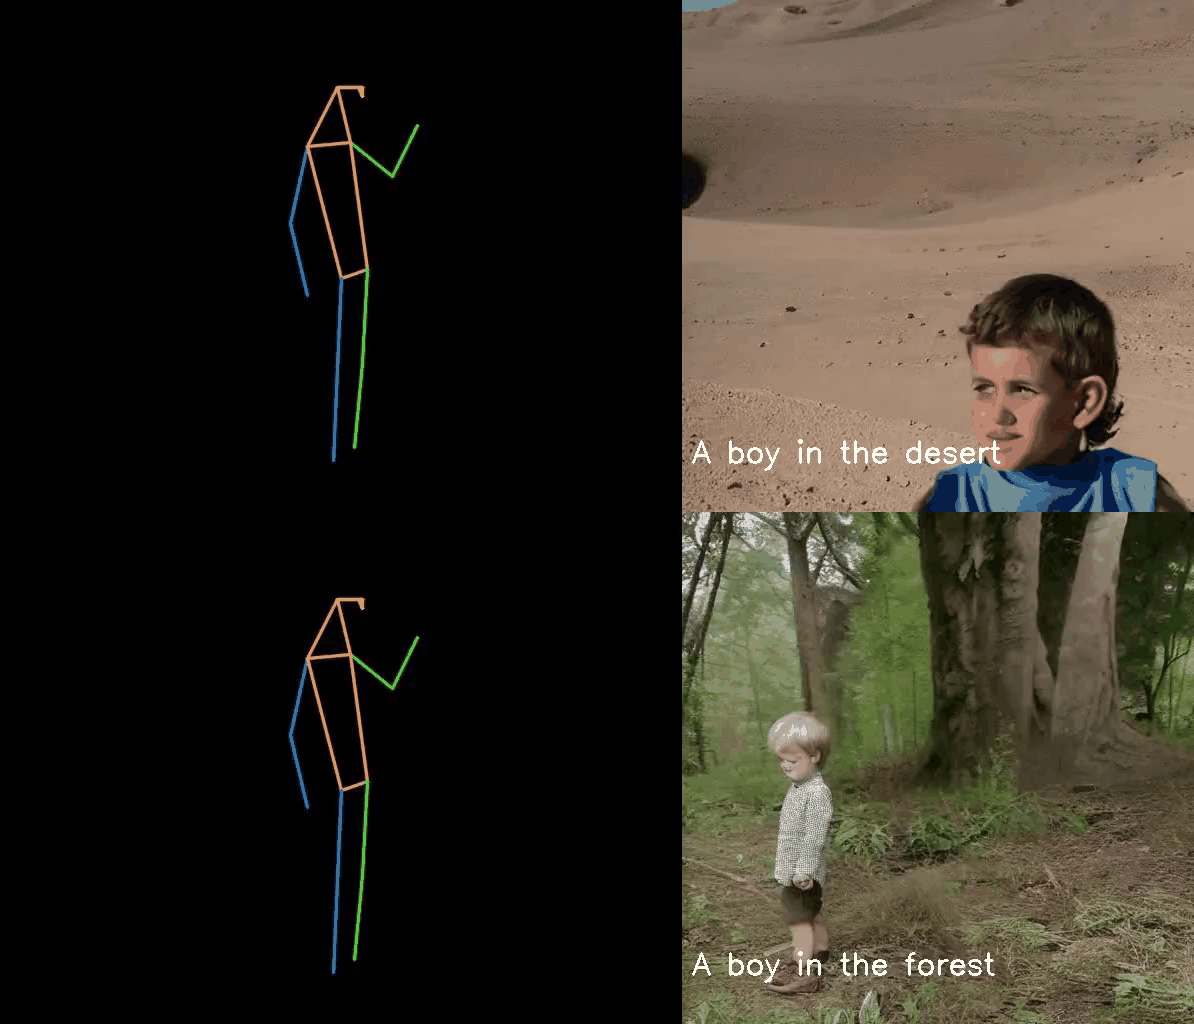

In [ ]:
#@title 3.7 Display Both Side By Side

import warnings
from moviepy.editor import VideoFileClip, clips_array
from IPython.display import display, HTML
import base64

# Function to combine multiple video files into one on top of each other
def combine_video_files(skeleton_paths, gif_paths, output_path):
    num_videos = min(len(skeleton_paths), len(gif_paths))

    combined_clips = []

    for i in range(0, num_videos, 2):
        if i + 1 < num_videos:
            skeleton_clip_1 = VideoFileClip(skeleton_paths[i])
            gif_clip_1 = VideoFileClip(gif_paths[i])
            skeleton_clip_2 = VideoFileClip(skeleton_paths[i + 1])
            gif_clip_2 = VideoFileClip(gif_paths[i + 1])

            # Get the minimum duration between the two pairs
            min_duration = min(skeleton_clip_1.duration, gif_clip_1.duration, skeleton_clip_2.duration, gif_clip_2.duration)

            # Set the duration of all clips to the minimum duration
            skeleton_clip_1 = skeleton_clip_1.subclip(0, min_duration)
            gif_clip_1 = gif_clip_1.subclip(0, min_duration)
            skeleton_clip_2 = skeleton_clip_2.subclip(0, min_duration)
            gif_clip_2 = gif_clip_2.subclip(0, min_duration)

            # Get the dimensions (height and width) of the smallest clips
            min_height = min(skeleton_clip_1.h, gif_clip_1.h, skeleton_clip_2.h, gif_clip_2.h)
            min_width = min(skeleton_clip_1.w, gif_clip_1.w, skeleton_clip_2.w, gif_clip_2.w)

            # Resize all clips to have the same height and width
            skeleton_clip_1 = skeleton_clip_1.resize(height=min_height, width=min_width)
            gif_clip_1 = gif_clip_1.resize(height=min_height, width=min_width)
            skeleton_clip_2 = skeleton_clip_2.resize(height=min_height, width=min_width)
            gif_clip_2 = gif_clip_2.resize(height=min_height, width=min_width)

            # Combine the clips on top of each other
            combined_clip = clips_array([[skeleton_clip_1, gif_clip_1], [skeleton_clip_2, gif_clip_2]])

            combined_clips.append(combined_clip)

    # Calculate the final duration
    final_duration = min([clip.duration for clip in combined_clips])

    # Set the duration of all clips to the final duration
    combined_clips = [clip.subclip(0, final_duration) for clip in combined_clips]

    # Concatenate all combined clips
    final_video = clips_array([combined_clips])

    # Write the final video to the specified output file
    final_video.write_videofile(output_path, codec="libx264")

# Function to convert a video to a GIF
def convert_video_to_gif(vid, output_gif_path):
    # Load the MP4 video
    video = VideoFileClip(vid)
    # Convert the video to a GIF
    video.write_gif(output_gif_path, fps=10)
    # Close the video file
    video.close()

# Function to display GIFs
def display_gif(gif_path_or_url):
    if gif_path_or_url.startswith("http"):
        gif_html = f'<img src="{gif_path_or_url}" alt="GIF">'
    else:
        with open(gif_path_or_url, "rb") as f:
            data = f.read()
            data_uri = "data:image/gif;base64," + base64.b64encode(data).decode("utf-8")
            gif_html = f'<img src="{data_uri}" alt="GIF">'
    display(HTML(gif_html))

# Specify the number of videos to display (should be an even number)
num_videos_to_display = min(len(skeleton_video_paths), len(gif_video_paths))

# Combine and display the selected number of videos on top of each other
combine_video_files(skeleton_video_paths, gif_video_paths, "combined_video.mp4")
convert_video_to_gif("combined_video.mp4", "output.gif")
display_gif("output.gif")


## 4. Analysis - Superimpose

This section allows the user to analyze the inferencing the output by super imposing the input skeleton videos on the initial input video(input for skeleton generation) and the inferencing output.

MoviePy - Building file ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_O4P08.gif with imageio.


./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the desert_caption.mp4 ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the desert_caption.gif


MoviePy - Building file ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the desert_caption.gif with imageio.


./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the forest_caption.mp4 ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the forest_caption.gif
MoviePy - Building file ./output/inference/sample-1000-33-2023-11-20 01:35:03.101155/superimposed_A boy in the forest_caption.gif with imageio.



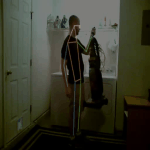
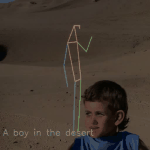
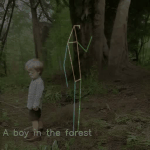

In [ ]:
#@title 4.1 Superimpose videos
import cv2
import yaml
from moviepy.editor import VideoFileClip

# Load the YAML configuration from the file (or use yaml.safe_load for a YAML string)
with open(SELECTED_CONF, 'r') as yaml_file:
    config = yaml.safe_load(yaml_file)

# Access the "skeleton_path" from the configuration
skeleton_path_for_imposing = config.get("skeleton_path")

# Set the desired width and height for the resized GIF
desired_width = 150
desired_height = 150

# Define the function to overlay two videos
def superimpose_videos(video1_path, video2_path, video_name):
    # Open the two video files
    video1 = cv2.VideoCapture(video1_path)
    video2 = cv2.VideoCapture(video2_path)

    # Get video properties
    frame_width = int(video2.get(3))
    frame_height = int(video2.get(4))
    frame_rate = int(video2.get(5))

    # Define the codec and create a VideoWriter object to save the output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    video_output_path = f'{folder_path}/superimposed_{video_name}.mp4'
    out = cv2.VideoWriter(video_output_path, fourcc, frame_rate, (frame_width, frame_height))

    while True:
        ret1, frame1 = video1.read()
        ret2, frame2 = video2.read()

        if not ret1 or not ret2:
            break

        # Ensure both frames have the same dimensions
        frame1 = cv2.resize(frame1, (frame_width, frame_height))

        # Overlay the two frames using addWeighted
        result = cv2.addWeighted(frame1, 0.5, frame2, 0.5, 0)

        # Write the result frame to the output video
        out.write(result)

    # Release the video objects and the output video
    video1.release()
    video2.release()
    out.release()

# Function to convert a video to a GIF
def convert_video_to_gif(vid, output_gif_path,width, height):
    # Load the MP4 video
    video = VideoFileClip(vid)
    # Resize the video frames to the specified width and height
    resized_video = video.resize((width, height))

    # Convert the resized video to a GIF
    resized_video.write_gif(output_gif_path, fps=10)
    # Close the video file
    video.close()

# List saved GIFs
def list_saved_gifs():
    folder = folder_path  # Use to get the current directory
    saved_gifs = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.lower().endswith("_caption.mp4")]
    # Filter out the GIF files that do not start with "superimpose"
    filtered_gifs = [gif for gif in saved_gifs if not gif.lower().startswith("superimpose")]
    return filtered_gifs

# Declare the skeleton path to superimpose, gifs to be superimposed on, and file path to save the superimposed videos to
skeleton_path = skeleton_path_for_imposing
saved_gifs = list_saved_gifs()
filepath = folder_path

# Create lists to collect the file paths and display names
gif_file_paths = []
gif_display_names = []

# Convert actual video file to gif
superimpose_videos(skeleton_path, Input_Path, Input_Path.split('/')[4].split('.')[0])
in_set = f'{filepath}/superimposed_{Input_Path.split("/")[4].split(".")[0]}.mp4'
out_set = f'{filepath}/superimposed_{Input_Path.split("/")[4].split(".")[0]}.gif'
convert_video_to_gif(in_set, out_set,desired_width, desired_height)
gif_file_paths.append(out_set)
gif_display_names.append("Original")
# Append to gif_file_paths as the first




# Call the superimpose_videos function
for gif in saved_gifs:

    superimpose_videos(skeleton_path, f'{filepath}/{gif.split(".")[0]}.mp4', gif.split(".")[0])
    print(f'{filepath}/superimposed_{gif}', f'{filepath}/superimposed_{gif.split(".")[0]}.gif')
    convert_video_to_gif(f'{filepath}/superimposed_{gif}', f'{filepath}/superimposed_{gif.split(".")[0]}.gif',desired_width, desired_height)
    gif_file_paths.append(f'{filepath}/superimposed_{gif.split(".")[0]}.gif')
    gif_display_names.append(gif.split(',')[0])




display_gifs_horizontally(gif_file_paths, gif_display_names)


## 5. Analysis - FID

This section performs quantitative analysis by calculating the Fréchet Inception Distance between the input video(for mmpose) and output(from inferencing). Firstly, the original video is resized to fit the generated video, then it is cut into frames which are used to calculate the Fid. This Section would analyze how accurate the resultant video **before** inferencing in comparison to the original video.

*For your information:*
Fréchet Inception Distance (FID) is a measure used in machine learning to assess the quality of computer-generated images. It combines two main aspects: the diversity and quality of the generated images compared to real ones (Inception Score) and the overall similarity in style and characteristics (Fréchet Distance). A lower FID suggests that the generated images closely resemble the real ones in terms of both variety and style, indicating higher quality in the image generation process.


In [ ]:
#@title 5.1 Resize Original Video and Cut Them into Frames

import cv2
import os

def extract_and_resize_frames(video_path, output_folder, num_frames=4, target_size=(512, 512)):
    # Extract the video file name without extension
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Create a folder with an autogenerated name for resized frames
    output_subfolder = os.path.join(output_folder, f"{video_name}_output")
    os.makedirs(output_subfolder, exist_ok=True)

    # Read and save the first n frames
    frame_count = 0
    while frame_count < num_frames:
        ret, frame = cap.read()

        # Break the loop if we reach the end of the video
        if not ret:
            break

        # Resize the frame to the target size (512x512)
        resized_frame = cv2.resize(frame, target_size)

        # Save the resized frame with the original video name
        frame_count += 1
        frame_filename = os.path.join(output_subfolder, f"{video_name}_frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, resized_frame)

    # Release the video capture object
    cap.release()

    print(f"{num_frames} frames resized and extracted to {output_subfolder}.")

# Example usage
video_path = Input_Path  # Use the value of Input_Path
output_folder = './output'

extract_and_resize_frames(video_path, output_folder, num_frames=4)


4 frames resized and extracted to ./output/O6DJW_output.


In [ ]:
#@title 5.2 Cut Result Video into Frames

import cv2
import os
import glob
from omegaconf import OmegaConf

yaml_file_name = os.path.splitext(os.path.basename(SELECTED_CONF))[0]

def extract_first_n_frames(parent_directory, folder_name_pattern, output_folder, num_frames=4):
    # Find the matching folders
    matching_folders = glob.glob(os.path.join(parent_directory, folder_name_pattern))

    for folder_path in matching_folders:
        if not os.path.isdir(folder_path):
            continue

        # Extract the video file name without extension
        video_name = os.path.basename(folder_path)

        # Load the YAML configuration file
        config_path = os.path.join("configs", f"{yaml_file_name}.yaml")
        if not os.path.exists(config_path):
            # If the config file is not found, try using the video name as-is
            config_path = os.path.join("configs", f"{video_name}")

            print(f"Checking config path: {config_path}")  # Debugging statement

            if not os.path.exists(config_path):
                print(f"Error: Config file not found for {video_name}.")
                continue

        config = OmegaConf.load(config_path)

        # Get validation prompts from the configuration file
        validation_prompts_config = global_validation_prompts_config

        for prompt_index, validation_prompts_config  in enumerate(validation_prompts_config ):
            # Remove commas and square brackets from the prompt for folder naming
            prompt_folder_name = validation_prompts_config.replace(",", "").replace("[", "").replace("]", "")

            # Adjust output folder structure
            output_subfolder = os.path.join(output_folder, "frames", f"{video_name}_{prompt_folder_name}_frames")
            os.makedirs(output_subfolder, exist_ok=True)

            # Remove square brackets from the prompts for constructing the file path
            cleaned_prompts = validation_prompts_config.replace("[", "").replace("]", "")

            # Open the video file
            video_file_path = os.path.join(folder_path, f"{cleaned_prompts}.gif")
            print(f"Attempting to open video: {video_file_path}")
            cap = cv2.VideoCapture(video_file_path)

            # Check if the video file opened successfully
            if not cap.isOpened():
                print(f"Error: Could not open video '{video_file_path}'.")
                continue

            # Read and save the first n frames
            frame_count = 0
            while frame_count < num_frames:
                ret, frame = cap.read()

                # Break the loop if we reach the end of the video
                if not ret:
                    break

                # Save the frame with the original video name
                frame_count += 1
                frame_filename = os.path.join(output_subfolder, f"{video_name}_frame_{frame_count:04d}.jpg")
                cv2.imwrite(frame_filename, frame)

            # Release the video capture object
            cap.release()

            print(f"Frames for '{video_name}' and prompt '{validation_prompts_config}' extracted and saved to: {output_subfolder}")

# Example usage
parent_directory = "./output/samples"
folder_name_pattern = '*'
output_folder = './output'

extract_first_n_frames(parent_directory, folder_name_pattern, output_folder, num_frames=4)


Attempting to open video: ./output/samples/apose-sample-100/A boy on the beach.gif
Frames for 'apose-sample-100' and prompt 'A boy on the beach' extracted and saved to: ./output/frames/apose-sample-100_A boy on the beach_frames
Attempting to open video: ./output/samples/apose-sample-100/A girl in the forest.gif
Frames for 'apose-sample-100' and prompt 'A girl in the forest' extracted and saved to: ./output/frames/apose-sample-100_A girl in the forest_frames


In [ ]:
#@title 5.3 Calculate FID
#@markdown FID result(s) should be  in numeric value and according to the amount of validation of prompts strings indicated in Subsection 2.3. The FID is calculated according to the order of validation of prompts string in Subsection 2.3. The FID's acceptance criteria is below 700 and the lower the value is, the better.
import os
import subprocess

# Extract the video name from the Input_Path
og_vid = os.path.splitext(os.path.basename(Input_Path))[0]

# Specify the path to the frames folder
frames_folder = "./output/frames"

# Get the list of folders inside the frames folder
folders = [f for f in os.listdir(frames_folder) if os.path.isdir(os.path.join(frames_folder, f))]

# Print information about the number of folders before creating dynamic commands
print(f"Number of folders before processing: {len(folders)}")
print(f"Folders before processing: {folders}")

# Output file path
output_file_path = "fid_output.txt"

# Run the dynamic commands, redirecting output to a file
with open(output_file_path, "w") as output_file:
    for folder in folders:
        if "ipynb" not in folder.lower():
            command = f"python3 -m pytorch_fid --batch-size 16 ./output/{og_vid}_output './output/frames/{folder}'"
            print(f"Running command: {command}")

            try:
                # Redirect stdout and stderr to the output file
                subprocess.run(command, shell=True, stdout=output_file, stderr=subprocess.STDOUT, text=True, check=True)
                print(f"Command output written to {output_file_path}")
            except subprocess.CalledProcessError as e:
                print(f"Error running command: {command}")
                print(f"Error output: {e.output}")

# Print information about the number of folders
print(f"\nNumber of folders: {len(folders)}")

# Print the extracted video name
print(f"Extracted Video Name: {og_vid}")

# Print the final output
print("\nCommand Outputs:")
with open(output_file_path, "r") as output_file:
    print(output_file.read())


Number of folders before processing: 2
Folders before processing: ['apose-sample-100_A girl in the forest_frames', 'apose-sample-100_A boy on the beach_frames']
Running command: python3 -m pytorch_fid --batch-size 16 ./output/O6DJW_output './output/frames/apose-sample-100_A girl in the forest_frames'
Command output written to fid_output.txt
Running command: python3 -m pytorch_fid --batch-size 16 ./output/O6DJW_output './output/frames/apose-sample-100_A boy on the beach_frames'
Command output written to fid_output.txt

Number of folders: 2
Extracted Video Name: O6DJW

Command Outputs:
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth

  0%|          | 0.00/91.2M [00:00<?, ?B/s]
 28%|██▊       | 25.2M/91.2M [00:00<00:00, 265MB/s]
 66%|██████▌   | 60.0M/91.2M [00:00<00:00, 323MB/s]
100%|██████████| 91.2M/91.2M [00:00<00:00, 328MB/s]

100%|█████